In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [5]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

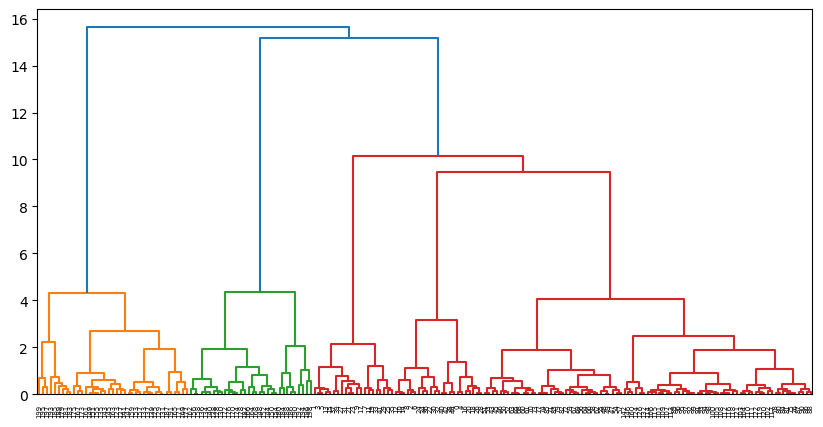

In [6]:
linked=linkage(x_scaled,method="ward")
plt.figure(figsize=(10,5))
dendrogram(linked)

plt.show()

In [7]:
n_clusters=5

In [8]:
model=AgglomerativeClustering(n_clusters=n_clusters,linkage="ward"
                             )
labels=model.fit_predict(x_scaled)

In [9]:
df["Cluster"]=labels

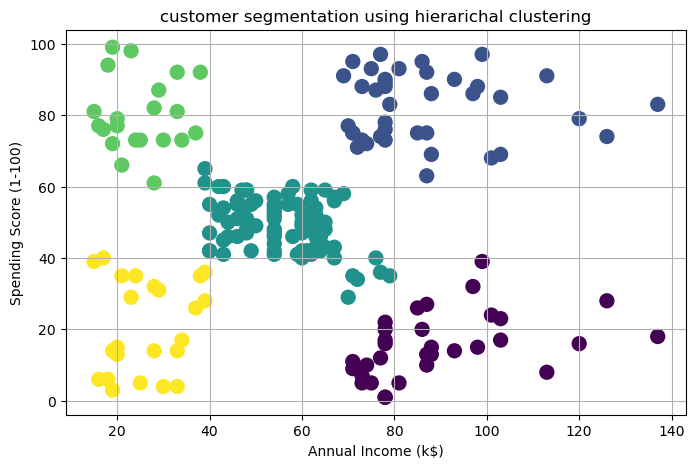

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df["Cluster"],cmap="viridis",s=100)
plt.title("customer segmentation using hierarichal clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

In [27]:
print(df[["CustomerID","Gender","Annual Income (k$)","Cluster","Spending Score (1-100)"]].head())

   CustomerID  Gender  Annual Income (k$)  Cluster  Spending Score (1-100)
0           1    Male                  15        4                      39
1           2    Male                  15        3                      81
2           3  Female                  16        4                       6
3           4  Female                  16        3                      77
4           5  Female                  17        4                      40
